In [1]:
#import python libraries which we will need
#pandas: reading dataset into a data frame.
#numpy :to make mathematical manipulation on data easily and speed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

In [2]:
#read the data
data = pd.read_csv('E:\\machine learning\medical data\diabets\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

data has no  null values

In [38]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


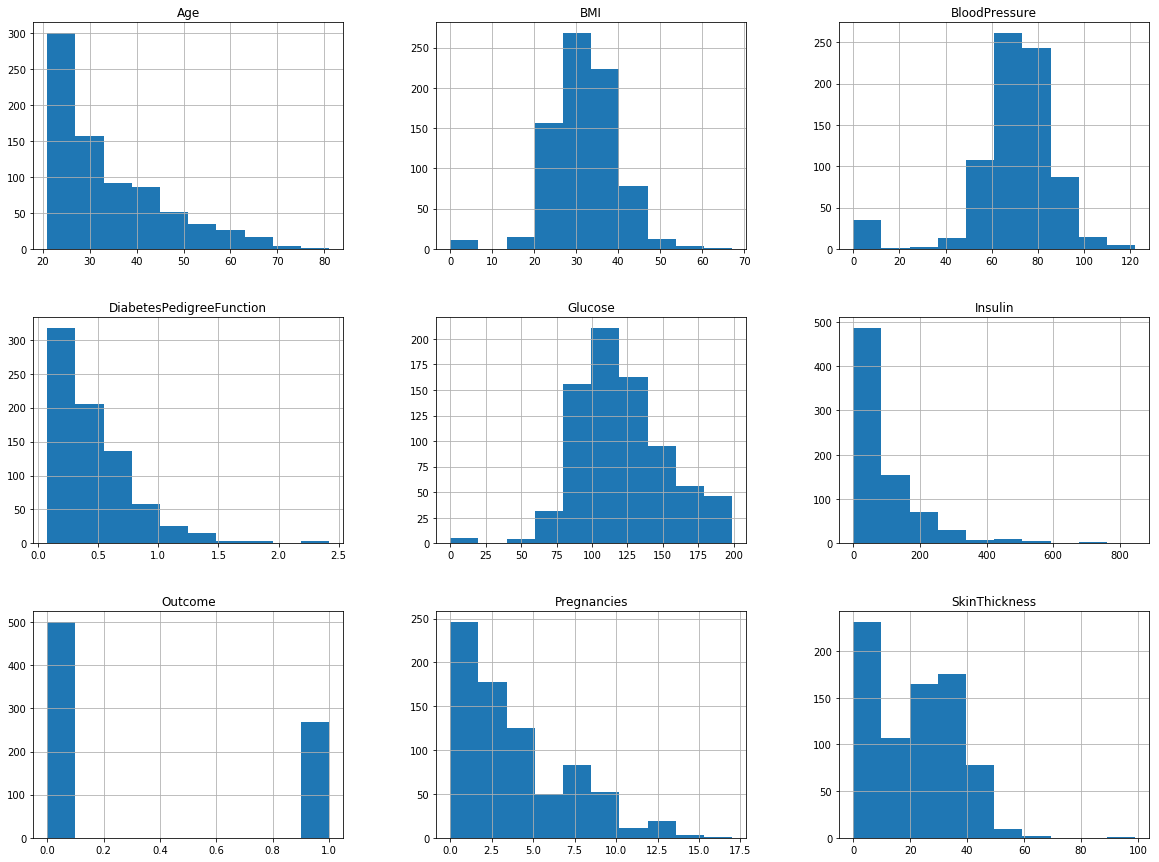

In [39]:
data.hist(bins=10,figsize=(20,15))
plt.show()

In [6]:
all_outliers_idx = []
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    
    #  Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature],25)
    
    #  Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(feature_outliers)
    # save all outliers indecies in a list
    for idx in list(feature_outliers.index):
        all_outliers_idx.append(idx)
# OPTIONAL: Select the indices for data points you wish to remove
outliers =[]
# if outlier index is common between two features or more save it in outliers list to remove it.
for idx in set(all_outliers_idx):
    if all_outliers_idx.count(idx) > 1:
        outliers.append(idx)
outliers.sort()
print("outlier indecies = ", outliers)
# Remove the outliers, if any were specified
good_data =data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Pregnancies':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


Data points considered outliers for the feature 'Glucose':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Data points considered outliers for the feature 'BloodPressure':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


Data points considered outliers for the feature 'SkinThickness':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


Data points considered outliers for the feature 'Insulin':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


Data points considered outliers for the feature 'BMI':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


Data points considered outliers for the feature 'DiabetesPedigreeFunction':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


Data points considered outliers for the feature 'Age':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


Data points considered outliers for the feature 'Outcome':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


outlier indecies =  [49, 60, 81, 125, 177, 193, 228, 247, 370, 371, 426, 445, 453, 494, 522, 684, 706]


In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

features_log_minmax_transform = pd.DataFrame(data = good_data)
features_log_minmax_transform[numerical] = scaler.fit_transform(good_data[numerical])
new_data=features_log_minmax_transform
# Show an example of a record with scaling applied
display(new_data.head(n = 5))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.586387,0.248416,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.464223,0.123529,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.406632,0.268778,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.490401,0.040271,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.752182,1.000000,0.200000,1.0


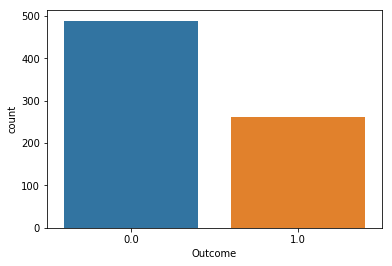

In [41]:
sns.countplot(x=new_data['Outcome'],data=new_data.drop('Outcome',axis=1))
plt.show()

 PairPlots:
 

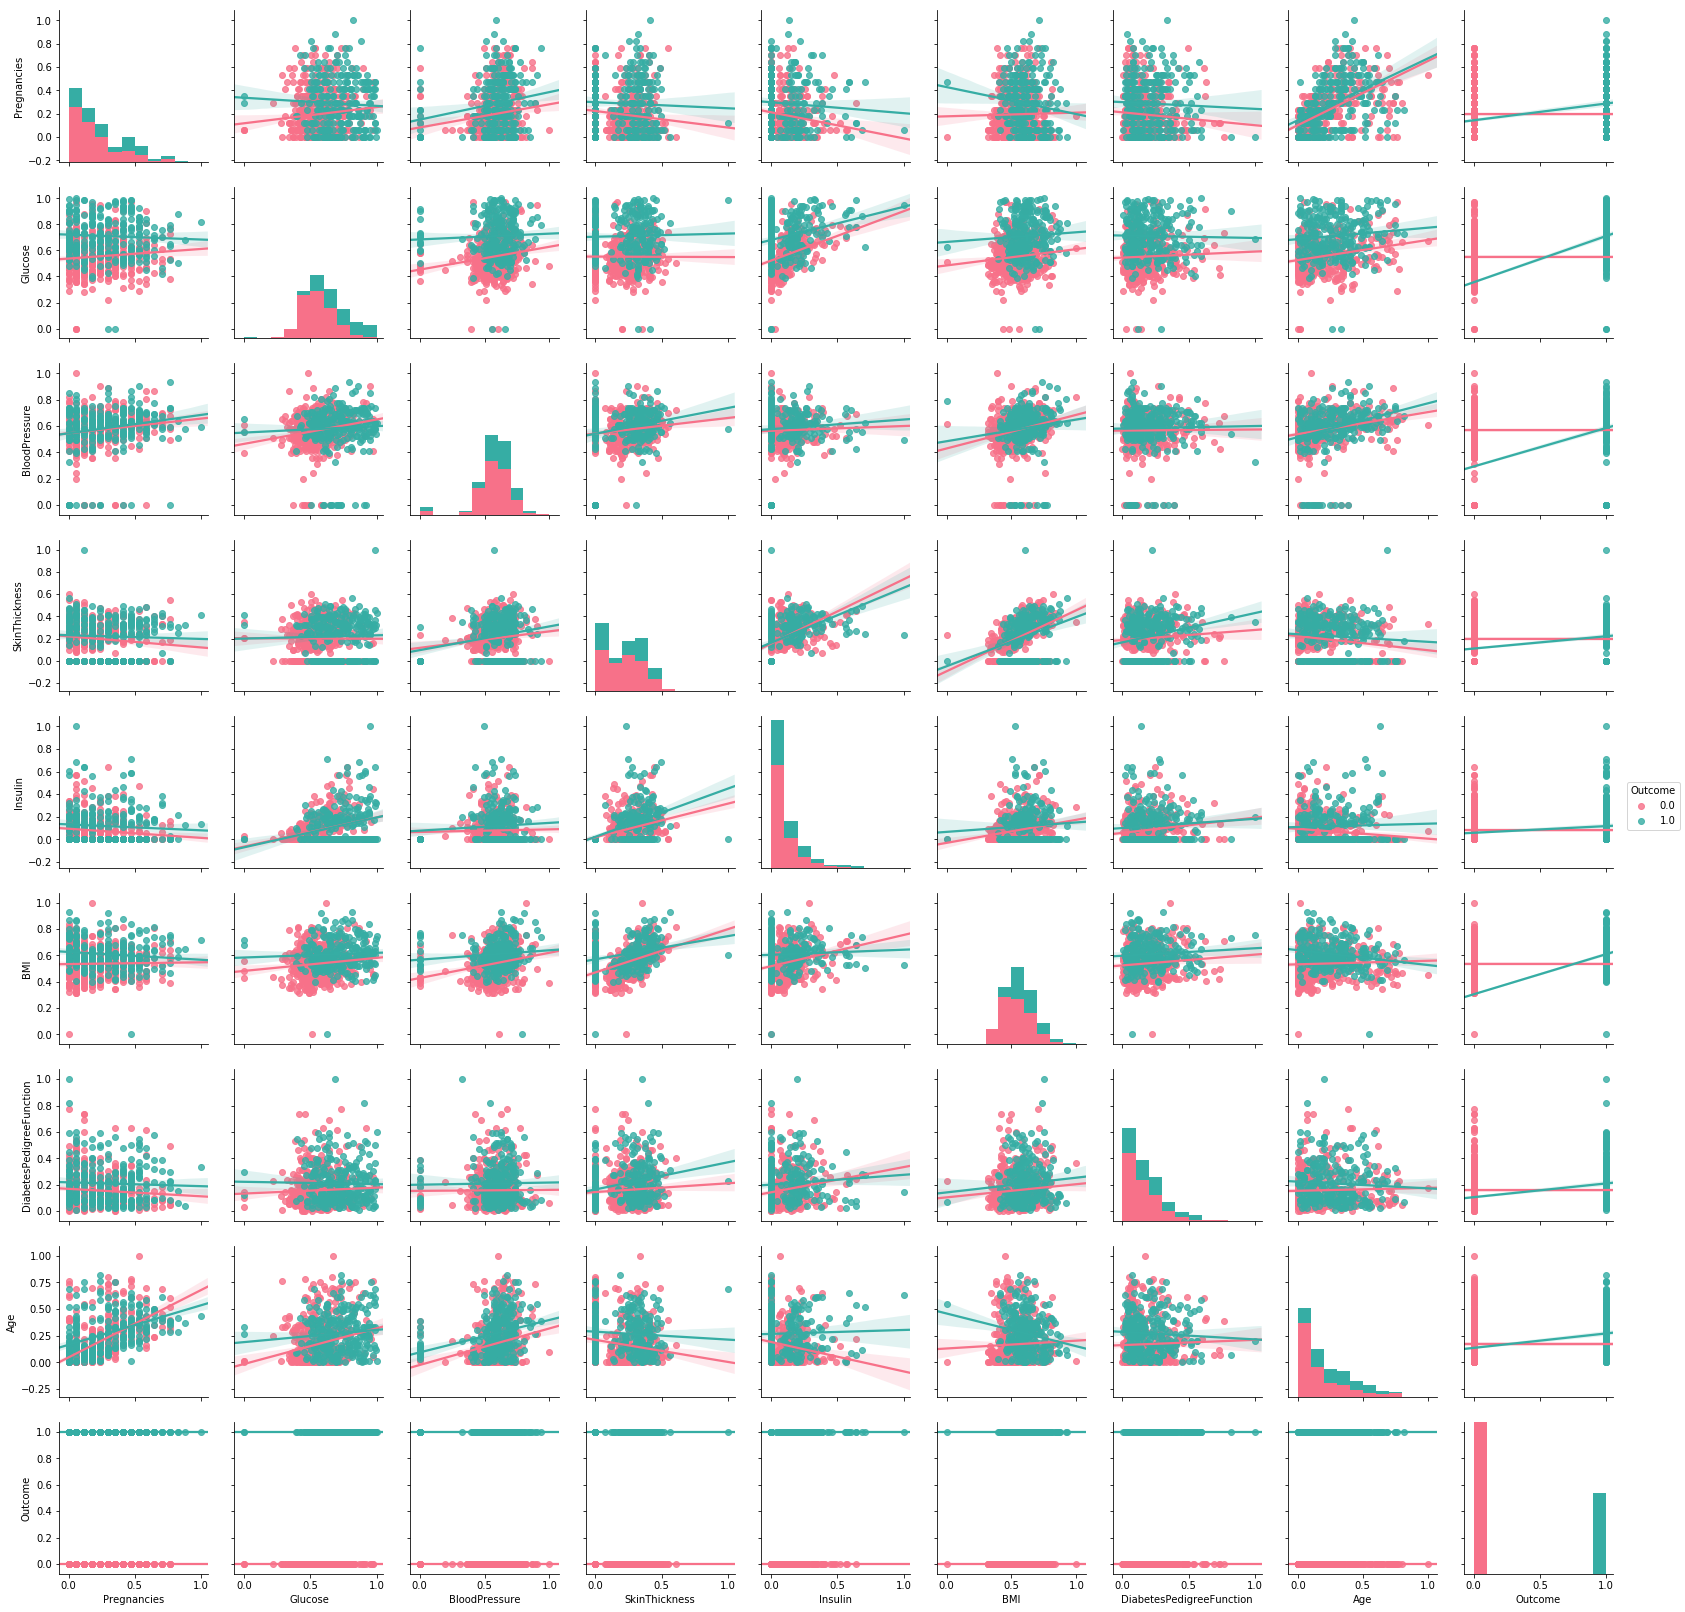

In [42]:
sns.pairplot(new_data, hue="Outcome", palette="husl",kind="reg")
plt.show()

In [8]:
#Split the data into features and target label
y=new_data['Outcome']
X=new_data.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.586387,0.248416,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.464223,0.123529,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.406632,0.268778,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.490401,0.040271,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.752182,1.000000,0.200000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.446771,0.055656,0.150000
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.541012,0.076923,0.083333
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.616056,0.025339,0.133333
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.532286,0.036199,0.533333
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.069683,0.550000


In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 525 samples.
Testing set has 226 samples.


In [20]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_test = dtc.predict(X_test)
predictions_train = dtc.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.7)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.7)
#print results
print('accuracy on test set:',results_acc_test )
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.694690265487
 F-score on the test: 0.585626052779


In [21]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import AdaBoostClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
AD =AdaBoostClassifier(random_state=1)
AD.fit(X_train,y_train)
predictions_test = AD.predict(X_test)
predictions_train = AD.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.7)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.7)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.747787610619
 F-score on the test: 0.657335365365


In [28]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import LogisticRegression Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#initalize  LogisticRegression model
lg =LogisticRegression(random_state=1)
lg.fit(X_train,y_train)
predictions_test = lg.predict(X_test)
predictions_train = lg.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test= accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.7)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.7)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.752212389381
 F-score on the test: 0.642821310324


C:\Users\shaimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import SVC Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
#initalize svm model


sv = SVC(random_state=1,gamma= 'scale')
sv= CalibratedClassifierCV(sv)
sv.fit(X_train,y_train)
predictions_test = sv.predict(X_test)
predictions_train = sv.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.7)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.7)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


C:\Users\shaimaa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


accuracy on test set: 0.765486725664
 F-score on the test: 0.675678032615


In [22]:
# Import KNeighbors Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
predictions_test = classifier_knn.predict(X_test)
predictions_train = classifier_knn.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.7)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.7)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.730088495575
 F-score on the test: 0.629733985249


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score



#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=0)      
clr_rf = clf_rf.fit(X_train,y_train)

predictions_test = classifier_knn.predict(X_test)
predictions_train = classifier_knn.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.7)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.7)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.730088495575
 F-score on the test: 0.629733985249


C:\Users\shaimaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


All 3 classifiers combined

In [35]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier
ensemble_svm_lr_AD=VotingClassifier(estimators=[('KNN', classifier_knn), ('Logistic Regression', lg),('adaboost classifer',AD )], 
                       voting='soft', weights=[3,2,1]).fit(X_train,y_train)
print('The ensembled model with all the 3 classifiers is:',ensemble_svm_lr_AD.score(X_train,y_train))


The ensembled model with all the 3 classifiers is: 0.809523809524


C:\Users\shaimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
